https://www.clarin.com/ciudades/departamentos-chicos_0_rkflu6AuPme.html

# Tendencia o crisis habitacional:

Si bien la nota se refiere a la Ciudad de Buenos Aires, nosotros evaluaremos tres instancias:
1) Capital Federal
2) AMBA
3) Todo el país

## ¿La cantidad de publicaciones de casas de 30 metros cuadrados o menos va en alza?
## ¿Cuál es el porcentaje de publicaciones de casas por ambientes?


In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pev2 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
pev3 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
pev4 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell-six_months.csv')
pev5 = pd.read_csv('properties/properati-AR-2014-12-01-properties-sell.csv')
pev6 = pd.read_csv('properties/properati-AR-2013-12-01-properties-sell.csv')
pev7 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell.csv')

/home/nicolas/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#389594 entries
pevconc = pd.concat([pev2,pev3]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pev = pd.concat([pevconc, pev7]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389594 entries, 0 to 389593
Data columns (total 29 columns):
country_name                  131146 non-null object
created_on                    389594 non-null object
currency                      321983 non-null object
description                   255081 non-null object
expenses                      21657 non-null object
extra                         123943 non-null object
floor                         55013 non-null float64
geonames_id                   328381 non-null float64
id                            131146 non-null object
image_thumbnail               380067 non-null object
lat                           315425 non-null float64
lat-lon                       315425 non-null object
lon                           315420 non-null float64
operation                     389594 non-null object
place_name                    389563 non-null object
place_with_parent_names       389594 non-null object
price                         329113 no

In [4]:
pev.head(20)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,Argentina,2016-07-01,ARS,Corredor Responsable: Martin Eguiazu - CCI Mat...,NaN,NaN,NaN,3856022.0,3725ec6040dd4c59e6807752b23bc376fe927753,https://thumbs4.properati.com/8/JiQiOmUpHQ06Co...,...,125000.000000,NaN,http://www.properati.com.ar/zo0f_venta_casa_sa...,house,NaN,Santa Fe,20.0,NaN,NaN,Venta de casa de 3 dormitorios
1,Argentina,2016-07-01,USD,Corredor Responsable: Uno Bienes Raices SRL - ...,NaN,NaN,1.0,3436109.0,d91f4f90ae4c28aff9d696dbee7e8d4fac154bc8,https://thumbs4.properati.com/4/bzYZriZno3lXfC...,...,2111.111111,NaN,http://www.properati.com.ar/zo17_venta_departa...,apartment,4.0,Capital Federal,180.0,NaN,NaN,Hermoso Piso en Edificio de Estilo.4amb con dep.
2,Argentina,2016-07-01,NaN,"En lo mejor de Rumenco , se encuentra esta cas...",NaN,NaN,NaN,3430863.0,17760ecd8751167a1ce2eed3d589d390874213cd,https://thumbs4.properati.com/2/Ffvi9GU4qYv3lx...,...,NaN,NaN,http://www.properati.com.ar/zo1e_venta_casa_ma...,house,5.0,Buenos Aires Costa Atlántica,260.0,NaN,787.0,"Casa Rumenco , Los Sauces"
3,Argentina,2016-07-01,USD,Corredor Responsable: Luis Alberto De Blas - C...,NaN,NaN,NaN,NaN,8ac8b6411bffa318882cd2961c978cc931f35e93,https://thumbs4.properati.com/3/LxBdWMWXWHUxA8...,...,9750.000000,NaN,http://www.properati.com.ar/zo1k_venta_casa_za...,house,NaN,Buenos Aires Interior,20.0,NaN,NaN,A demoler Lote para emprendimiento
4,Argentina,2016-07-01,USD,Corredor Responsable: Luis Alberto De Blas - C...,NaN,NaN,NaN,NaN,a1ad15fd9cbe67ddb0a7a735c5c4b27099871707,https://thumbs4.properati.com/0/4ul13t9aSvCx4G...,...,813.253012,NaN,http://www.properati.com.ar/zo1l_venta_casa_za...,house,NaN,Buenos Aires Interior,166.0,NaN,NaN,Casa una planta impecable.
5,Argentina,2016-07-01,NaN,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,NaN,NaN,NaN,NaN,201045bbf92f899b8680e15c0150cade5f9356da,https://thumbs4.properati.com/5/aiKEhatxLY0eEw...,...,NaN,NaN,http://www.properati.com.ar/zo25_venta_ph_la-p...,PH,4.0,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,Duplex en Gonnet
6,Argentina,2016-07-01,NaN,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,NaN,NaN,NaN,3435379.0,ee91e0f6610207f559a531e0835b9e00b1b3d350,https://thumbs4.properati.com/7/JL807rO6nv2X52...,...,NaN,NaN,http://www.properati.com.ar/zo27_venta_casa_la...,house,5.0,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,Casa en calle 446 - 24 y 25
7,Argentina,2016-07-01,ARS,Corredor Responsable: Joaquín Suárez - CI MAT ...,NaN,NaN,3.0,3838574.0,a97107f2a9efee83cd661aad0c0b64dc0f5e24b4,https://thumbs4.properati.com/7/KhdjsHUuRQ0blH...,...,23375.000000,NaN,http://www.properati.com.ar/zo3c_venta_departa...,apartment,NaN,Santa Fe,48.0,NaN,NaN,Vendo departamento céntrico de un dormitorio
8,Argentina,2016-07-01,ARS,Corredor Responsable: Joaquín Suárez - CI MAT ...,NaN,NaN,4.0,3838574.0,6ef9666eb3d92b73d843eb89fdd726c4d2a6c20e,https://thumbs4.properati.com/4/GLqBP_shBxRC6y...,...,22702.702703,NaN,http://www.properati.com.ar/zo3d_venta_departa...,apartment,NaN,Santa Fe,37.0,NaN,NaN,Vendo monoambiente céntrico
9,Argentina,2016-07-01,ARS,Corredor Responsable: Joaquín Suárez - CI MAT ...,NaN,NaN,3.0,3838574.0,64c50fe56da2280ca66d2579724ce3ad3a13e312,https://thumbs4.properati.com/1/wY0vUWZlBDBEgV...,...,23250.000000,NaN,http://www.properati.com.ar/zo3f_venta_departa...,apartment,NaN,Santa Fe,48.0,NaN,NaN,Vendo departamento céntrico de un dormitorio


## Evaluamos en Capital Federal

In [5]:
pev_capital = pev
pev_capital.dropna(subset=['state_name'], inplace=True)
pev_capital = pev.loc[pev.state_name.str.contains('Capital Federal'),:]
pev_capital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32092 entries, 1 to 131139
Data columns (total 29 columns):
country_name                  32092 non-null object
created_on                    32092 non-null object
currency                      29610 non-null object
description                   32092 non-null object
expenses                      7101 non-null object
extra                         0 non-null object
floor                         5656 non-null float64
geonames_id                   30644 non-null float64
id                            32092 non-null object
image_thumbnail               31944 non-null object
lat                           29821 non-null float64
lat-lon                       29821 non-null object
lon                           29821 non-null float64
operation                     32092 non-null object
place_name                    32092 non-null object
place_with_parent_names       32092 non-null object
price                         30597 non-null float64
price_a

In [6]:
import matplotlib.patches as mpatches

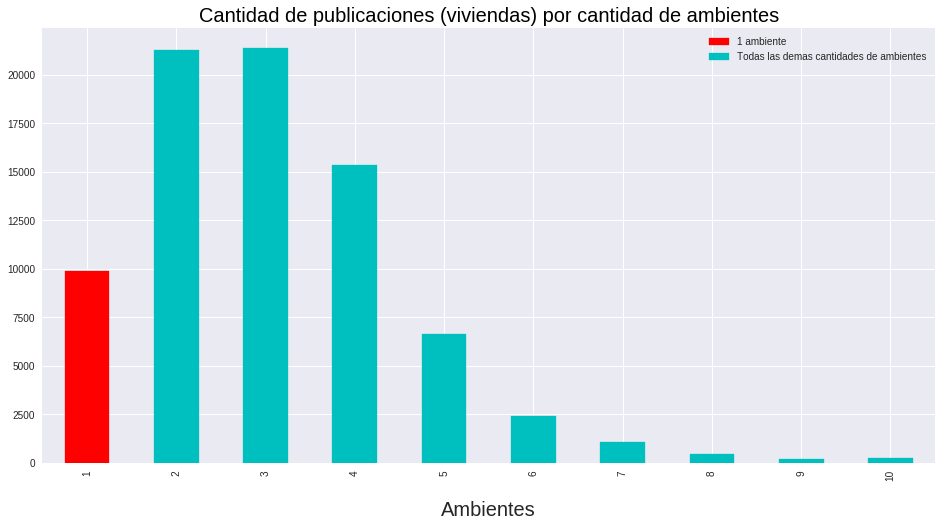

In [7]:
# En este gráfico se puede colorear la columna de 1 ambiente (que es la que buscamos estudiar)
# En primer lugar evalúo la cantidad de publicaciones (que no son tiendas comerciales) según 
#la cantidad de ambientes (rooms)
# Vemos que la mayor cantidad de viviendas publicadas corresponden a 2 y 3 ambientes

pev.dropna(subset=['property_type', 'rooms'], inplace=True)
pev_amb = pev.loc[((pev.property_type.str.contains('house')) | (pev.property_type.str.contains('PH')) | \
                   (pev.property_type.str.contains('apartment')) |(pev.property_type.str.contains('ph'))) &\
                  (pev.rooms<11) & (pev.rooms > 0),['rooms', 'state_name']].groupby('rooms').agg([np.size])

pev_amb = pd.DataFrame(pev_amb.to_records())
pev_amb.columns=['rooms','size']
pev_amb

pev_amb = pd.pivot_table(pev_amb, values='size', index='rooms')

f = plt.figure()
ax = pev_amb.plot(kind='bar', figsize=(16,8), ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
ax.set_title('Cantidad de publicaciones (viviendas) por cantidad de ambientes', color='black',size=20.0)
ax.set_xticklabels(['1','2','3','4','5','6','7', '8', '9', '10'])
ax.set_xlabel('Ambientes',size=20.0,labelpad=20.0);
cyan_patch = mpatches.Patch(color='c', label='Todas las demas cantidades de ambientes')
red_patch = mpatches.Patch(color='r', label='1 ambiente')

ax.get_children()[0].set_color('r');ax.get_children()[1].set_color('c');ax.get_children()[2].set_color('c');
ax.get_children()[3].set_color('c');ax.get_children()[4].set_color('c');ax.get_children()[5].set_color('c');
ax.get_children()[6].set_color('c');ax.get_children()[7].set_color('c');ax.get_children()[8].set_color('c');
ax.get_children()[9].set_color('c');
plt.legend(handles=[red_patch,cyan_patch])
#plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



Verificamos que las viviendas de un ambiente NO son las más populares entre las publicaciones de properati. Ahora estudiemos la evolución de la cantidad de viviendas de un ambiente a lo largo de los últimos dos años (2016 y 2017)

## Evolución histórica de la cantidad de viviendas de un ambiente en los años 2016 y 2017

In [8]:
pev.dropna(subset=['created_on'], inplace=True)

import calendar
pev['fecha'] = pd.to_datetime(pev['created_on'])
pev['anio'] = pev['fecha'].map(lambda x:x.year)
pev['mes'] = pev['fecha'].map(lambda x:x.month)
pev.head(10)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title,fecha,anio,mes
1,Argentina,2016-07-01,USD,Corredor Responsable: Uno Bienes Raices SRL - ...,NaN,NaN,1.0,3436109.0,d91f4f90ae4c28aff9d696dbee7e8d4fac154bc8,https://thumbs4.properati.com/4/bzYZriZno3lXfC...,...,apartment,4.0,Capital Federal,180.0,NaN,NaN,Hermoso Piso en Edificio de Estilo.4amb con dep.,2016-07-01,2016,7
2,Argentina,2016-07-01,NaN,"En lo mejor de Rumenco , se encuentra esta cas...",NaN,NaN,NaN,3430863.0,17760ecd8751167a1ce2eed3d589d390874213cd,https://thumbs4.properati.com/2/Ffvi9GU4qYv3lx...,...,house,5.0,Buenos Aires Costa Atlántica,260.0,NaN,787.0,"Casa Rumenco , Los Sauces",2016-07-01,2016,7
5,Argentina,2016-07-01,NaN,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,NaN,NaN,NaN,NaN,201045bbf92f899b8680e15c0150cade5f9356da,https://thumbs4.properati.com/5/aiKEhatxLY0eEw...,...,PH,4.0,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,Duplex en Gonnet,2016-07-01,2016,7
6,Argentina,2016-07-01,NaN,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,NaN,NaN,NaN,3435379.0,ee91e0f6610207f559a531e0835b9e00b1b3d350,https://thumbs4.properati.com/7/JL807rO6nv2X52...,...,house,5.0,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,Casa en calle 446 - 24 y 25,2016-07-01,2016,7
12,Argentina,2016-07-01,USD,Departamento 2 ambientes con cocheraAmplio com...,NaN,NaN,NaN,NaN,20c2ce54242e59c55d48d225d762b2b550de8f81,https://thumbs4.properati.com/9/sOcq27h1RCdftW...,...,apartment,2.0,Bs.As. G.B.A. Zona Sur,34.0,NaN,38.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
14,Argentina,2016-07-01,USD,En planta baja al frente departamento de 3 amb...,NaN,NaN,NaN,3428775.0,14cabaf5b67a50b7b6b2399eb4e2107dde5de5e4,https://thumbs4.properati.com/7/qTw1BLhccB-d0w...,...,house,6.0,Bs.As. G.B.A. Zona Oeste,NaN,NaN,NaN,CASA EN VENTA,2016-07-01,2016,7
15,Argentina,2016-07-01,USD,Es una casa de tres ambientes que cuenta con g...,NaN,NaN,NaN,3428775.0,b671feef9c7c645ad2cda37743a191263bf2c250,https://thumbs4.properati.com/3/aquVoAdEYmt6s4...,...,house,3.0,Bs.As. G.B.A. Zona Oeste,90.0,NaN,220.0,CASA EN VENTA,2016-07-01,2016,7
16,Argentina,2016-07-01,USD,Es un departamento SEMIPISO de dos ambientes a...,NaN,NaN,1.0,3428775.0,83b5b4764dff69c3717ae551194ddcf5c92c4739,https://thumbs4.properati.com/6/8anLcJZXpiGesP...,...,apartment,2.0,Bs.As. G.B.A. Zona Oeste,55.0,NaN,59.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
17,Argentina,2016-07-01,USD,Es un departamento SEMIPISO de dos ambientes a...,NaN,NaN,2.0,3428775.0,76935f2afc33629edeffb01251d83ea3f22f1277,https://thumbs4.properati.com/0/xftG6VhcM2COSx...,...,apartment,2.0,Bs.As. G.B.A. Zona Oeste,55.0,NaN,59.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7
18,Argentina,2016-07-01,USD,Es un departamento SEMIPISO de dos ambientes a...,NaN,NaN,3.0,3428775.0,0b62bdbd15d889155329f5db3cd92f9ae4e30769,https://thumbs4.properati.com/4/c21majz1rMWCj3...,...,apartment,2.0,Bs.As. G.B.A. Zona Oeste,55.0,NaN,59.0,DEPARTAMENTO EN VENTA,2016-07-01,2016,7


In [9]:
pev_1amb_2016 = \
    pev.loc[((pev.property_type.str.contains('house')) | (pev.property_type.str.contains('apartment'))) &\
            (pev.rooms==1) & (pev.anio == 2016), ['mes', 'state_name']].groupby('mes').\
            agg([np.size])
pev_1amb_2016 = pd.DataFrame(pev_1amb_2016.to_records())
pev_1amb_2016.columns=['mes','size']
pev_1amb_2016


,mes,size
0,1,517
1,2,613
2,3,936
3,4,350
4,5,259
5,6,582
6,7,908
7,8,358
8,9,467
9,10,530


In [10]:
# OJO QUE me están faltando los PH..... habría que usar el operador ~ con el str 'store'
pev_1amb = \
    pev.loc[((pev.property_type.str.contains('house')) | (pev.property_type.str.contains('apartment'))) &\
            (pev.rooms==1) & ( ((pev.anio == 2016) & (pev.mes > 05)) | ((pev.anio == 2017) &(pev.mes == 01)) ),\
            ['mes', 'state_name']].groupby('mes').agg([np.size])
pev_1amb = pd.DataFrame(pev_1amb.to_records())
pev_1amb.columns=['mes','size']
pev_1amb

,mes,size
0,1,1141
1,6,582
2,7,908
3,8,358
4,9,467
5,10,530
6,11,956
7,12,723


In [25]:
#cyan_patch = mpatches.Patch(color='c', label='Todas las demas cantidades de ambientes')
#red_patch = mpatches.Patch(color='r', label='1 ambiente')
#plt.legend(handles=[red_patch,cyan_patch])


for_plot = pd.pivot_table(pev_1amb_para_plot_ordenado, values='size', index='mes')
for_plot2 = for_plot.reindex([6,7,8,9,10,11,12,1])
for_plot2


,size
mes,
6,582
7,908
8,358
9,467
10,530
11,956
12,723
1,1141


TypeError: cannot convert dictionary update sequence element #0 to a sequence

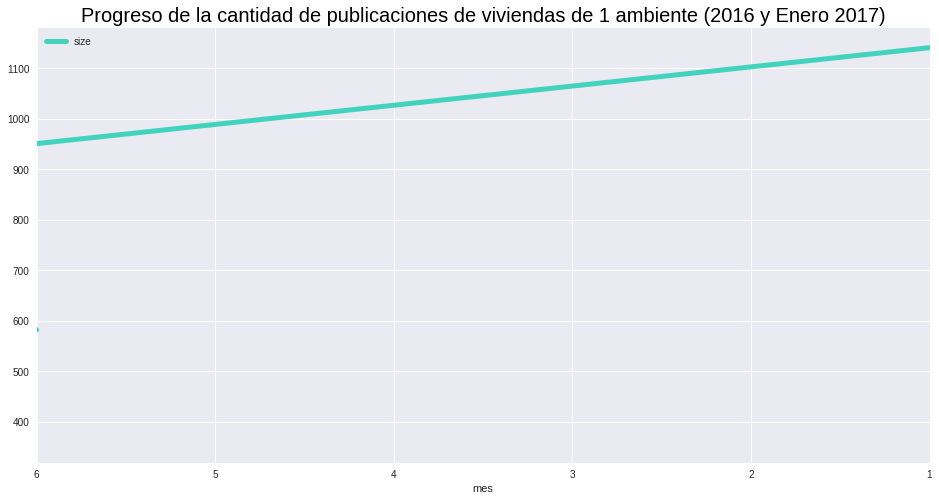

In [26]:
f=plt.figure()
ax=for_plot2.plot(figsize=(16,8), ax=f.gca(), linewidth=5.0, color='#41D3BD')
ax.set_title('Progreso de la cantidad de publicaciones de viviendas de 1 ambiente (2016 y Enero 2017)',\
             color='black',size=20.0)
ax.set_xticklabels(['Junio','Julio', 'Agosto', 'Septiembre','Octubre', 'Noviembre', 'Diciembre', 'Enero (2017)'])
ax.set_xlabel('Mes',size=20.0,labelpad=20.0);
plt.show()


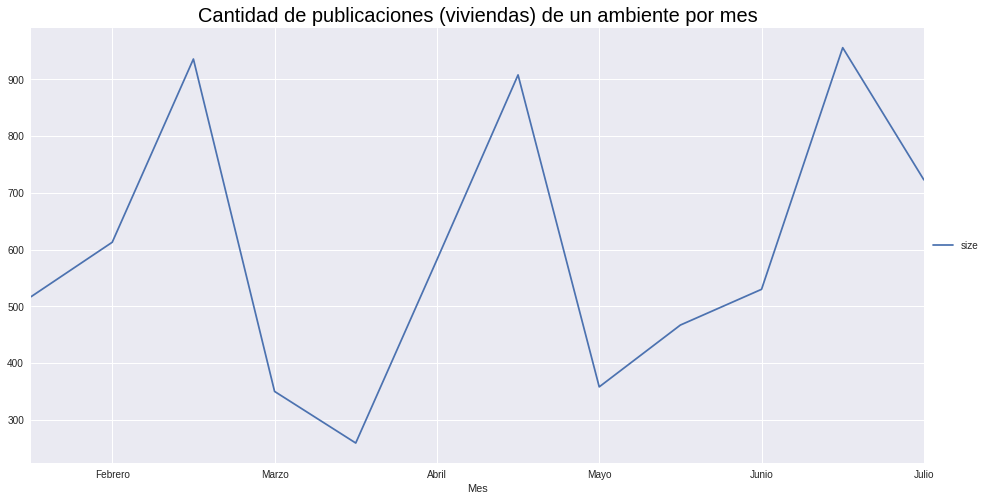

In [28]:
pev_1amb_2016 = pd.pivot_table(pev_1amb_2016, values='size', index='mes')

f = plt.figure()
ax = pev_1amb_2016.plot(kind='line', figsize=(16,8), ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
ax.set_title('Cantidad de publicaciones (viviendas) de un ambiente por mes', color='black',size=20.0)
ax.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio', 'Agosto', 'Septiembre',\
    'Octubre', 'Noviembre', 'Diciembre'])
ax.set_xlabel('Mes');
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


## Evaluemos la cantidad de publicaciones según superficie